# Alphavantage Intraday
* API for "real time" stock data

 #* Neeraj Yadav

### 1. Set up Environment

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

### 2. Store API Key

In [56]:
# API key
#key = pd.read_csv('3IINFOTECH.csv')
key = open('apikey.txt').read()

In [57]:
### 3. Create TimeSeries Object and Make API Call

In [58]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')
x = pd.Series([100])


### 4. Examine Data

In [59]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2021-01-22 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7079 entries, 2021-01-22 20:00:00 to 2021-01-11 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    7079 non-null   float64
 1   2. high    7079 non-null   float64
 2   3. low     7079 non-null   float64
 3   4. close   7079 non-null   float64
 4   5. volume  7079 non-null   float64
dtypes: float64(5)
memory usage: 331.8 KB


In [61]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-01-22 20:00:00,846.50,847.50,846.41,847.50,2392.0
2021-01-22 19:59:00,846.50,846.50,846.01,846.41,4138.0
2021-01-22 19:58:00,846.20,846.20,846.20,846.20,825.0
2021-01-22 19:57:00,846.50,846.50,846.50,846.50,2094.0
2021-01-22 19:56:00,846.48,846.48,846.48,846.48,667.0


# 5.Visualize the data 

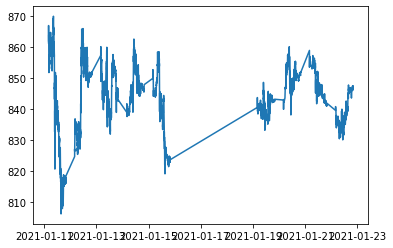

In [47]:
plt.plot(data['4. close'])

### 6. Rename Columns and Add Separate Date and Time Columns

In [48]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [49]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [50]:
data.loc['2020-12-31']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,


In [51]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3519 entries, 2021-01-11 09:30:00 to 2021-01-22 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3519 non-null   float64
 1   high       3519 non-null   float64
 2   low        3519 non-null   float64
 3   close      3519 non-null   float64
 4   volume     3519 non-null   float64
 5   TradeDate  3519 non-null   object 
 6   time       3519 non-null   object 
dtypes: float64(5), object(2)
memory usage: 219.9+ KB


## 7.Trade date Tables 

In [52]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-01-11,803.6222,854.4300
2021-01-12,827.3400,868.0000
2021-01-13,832.0000,860.4700
2021-01-14,838.7500,863.0000
2021-01-15,819.1000,859.9000
2021-01-19,833.0000,850.0000
2021-01-20,837.2800,859.5000
2021-01-21,841.4201,855.7199
2021-01-22,828.6200,848.0000


In [53]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-01-11 15:32:00,806.2650,809.8000,803.6222,807.8400,369834.0,2021-01-11,15:32:00
2021-01-12 09:31:00,831.0000,835.4000,827.3400,835.0000,745755.0,2021-01-12,09:31:00
2021-01-13 12:50:00,835.0300,835.0300,832.0000,832.0000,149402.0,2021-01-13,12:50:00
2021-01-14 09:38:00,839.4855,841.0400,838.7500,839.0630,162301.0,2021-01-14,09:38:00
2021-01-15 15:09:00,819.2000,821.3400,819.1000,820.6900,172460.0,2021-01-15,15:09:00
2021-01-19 11:01:00,833.3078,835.5414,833.0000,835.0900,123410.0,2021-01-19,11:01:00
2021-01-20 10:58:00,840.7500,840.9899,837.2800,838.1800,200655.0,2021-01-20,10:58:00
2021-01-21 10:40:00,842.5700,842.8500,841.4201,841.7861,98969.0,2021-01-21,10:40:00
2021-01-22 10:40:00,830.5000,831.4899,828.6200,830.1500,135384.0,2021-01-22,10:40:00


In [54]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-01-11 10:20:00,851.9644,854.4300,851.1500,851.4041,317788.0,2021-01-11,10:20:00
2021-01-12 11:40:00,866.0400,868.0000,865.8021,866.0350,275079.0,2021-01-12,11:40:00
2021-01-13 09:32:00,856.7900,860.4700,854.5000,859.0000,306304.0,2021-01-13,09:32:00
2021-01-14 10:35:00,861.9135,863.0000,861.1701,862.1850,155011.0,2021-01-14,10:35:00
2021-01-15 09:34:00,857.8900,859.9000,856.3001,857.5897,263174.0,2021-01-15,09:34:00
2021-01-19 09:43:00,846.1300,850.0000,845.5800,848.6800,218051.0,2021-01-19,09:43:00
2021-01-20 09:31:00,858.7400,859.5000,856.6500,858.6101,461482.0,2021-01-20,09:31:00
2021-01-21 09:31:00,855.0000,855.7199,853.0000,853.6900,348284.0,2021-01-21,09:31:00
2021-01-22 15:57:00,847.1600,848.0000,847.1100,847.8400,125587.0,2021-01-22,15:57:00
